In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 28s 6us/step


In [3]:
# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


In [5]:
print("Unique labels:", np.unique(train_labels))

Unique labels: [0 1 2 3 4 5 6 7 8 9]


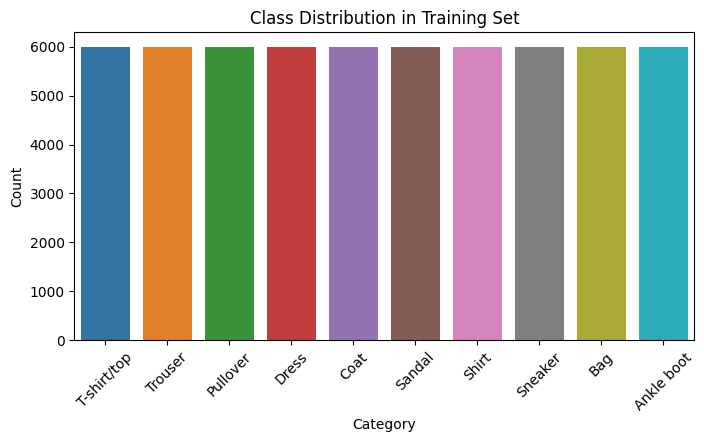

In [6]:
plt.figure(figsize=(8, 4))
sns.countplot(x=train_labels)
plt.title("Class Distribution in Training Set")
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

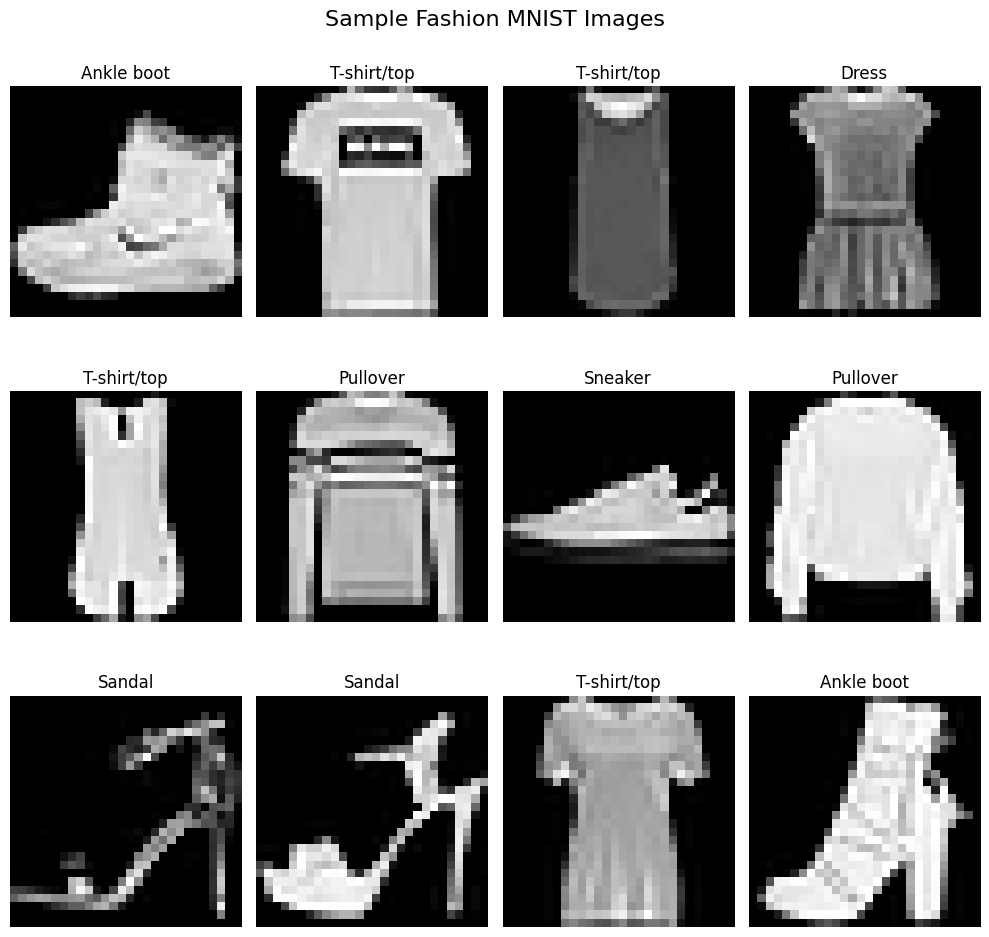

In [7]:
plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.suptitle("Sample Fashion MNIST Images", fontsize=16)
plt.tight_layout()
plt.show()

In [8]:
# Normalize pixel values to 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
# Reshape to add channel dimension (28x28x1)
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))


In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer
])


In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4728 - accuracy: 0.8273 - val_loss: 0.3801 - val_accuracy: 0.8645
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3124 - accuracy: 0.8872 - val_loss: 0.3304 - val_accuracy: 0.8819
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2672 - accuracy: 0.9029 - val_loss: 0.2802 - val_accuracy: 0.8984
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2359 - accuracy: 0.9133 - val_loss: 0.2869 - val_accuracy: 0.8945
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2111 - accuracy: 0.9222 - val_loss: 0.2606 - val_accuracy: 0.9038
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1914 - accuracy: 0.9296 - val_loss: 0.2716 - val_accuracy: 0.9029
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1743 - accuracy: 0.9359 - val_loss: 0.2571 -

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\n Test Accuracy: {test_acc * 100:.2f}%")

313/313 [==============================] - 2s 6ms/step - loss: 0.2846 - accuracy: 0.9058

 Test Accuracy: 90.58%
